In [9]:
import numpy as np

In [144]:
complex_loop = '''7-F7-
.FJ|7
SJLL7
|F--J
LJ.LJ'''


In [145]:
print(complex_loop.split("\n"))

['7-F7-', '.FJ|7', 'SJLL7', '|F--J', 'LJ.LJ']


In [146]:
def load_data(loop):
    loop = np.array([[x for x in l] for l in loop])
    return loop

In [147]:
load_data(complex_loop.split("\n"))

array([['7', '-', 'F', '7', '-'],
       ['.', 'F', 'J', '|', '7'],
       ['S', 'J', 'L', 'L', '7'],
       ['|', 'F', '-', '-', 'J'],
       ['L', 'J', '.', 'L', 'J']], dtype='<U1')

In [148]:
directions = {"F": [0, 1], # to the right
              "7": [1, 0], # down
              "|": [1, 0], # down
              "L": [0, 1], # right
              "-": [0,1], # right
              "J": [-1, 0]} #up
reverse_directions = {"F": [1, 0], # down
                      "7": [0, -1], #left
                      "|": [-1, 0], # up
                      "L": [-1, 0], # up
                      "-": [0, -1], # left
                      "J": [0, -1]} #left
parts = forward_directions.keys()

In [149]:
loop = load_data(complex_loop.split("\n"))

In [150]:
start_coord = np.argwhere(loop == "S")[0]

In [151]:
start_coord

array([2, 0])

In [152]:
loop

array([['7', '-', 'F', '7', '-'],
       ['.', 'F', 'J', '|', '7'],
       ['S', 'J', 'L', 'L', '7'],
       ['|', 'F', '-', '-', 'J'],
       ['L', 'J', '.', 'L', 'J']], dtype='<U1')

In [207]:
import sys
def traverse_loop(loop, instruction = np.array([1,0])):
    area = np.zeros(loop.shape)
    start_coord = np.argwhere(loop == "S")[0]
    coords = np.array([start_coord])
    loc = start_coord
    thereyet = False
    n = 0
    while not thereyet:
        y, x = loc+instruction
        next_pipe = loop[y, x]
        if next_pipe == "S":
            print(f"BACK AT START in {n+1} steps!")
            thereyet = True
            area[y, x] = 16
            return n+1, coords
            
        loc = loc+instruction
        next_instruction = np.array(directions[next_pipe])
        test = next_instruction + instruction
        if test[0] == 0 and test[1] == 0:
            next_instruction = reverse_directions[next_pipe]
        instruction = next_instruction
        n+=1
        coords = np.vstack([coords, loc])
        area[loc[0], loc[1]] = n
    
        

In [208]:
traverse_loop(loop)

BACK AT START in 16 steps!


(16,
 array([[2, 0],
        [3, 0],
        [4, 0],
        [4, 1],
        [3, 1],
        [3, 2],
        [3, 3],
        [3, 4],
        [2, 4],
        [2, 3],
        [1, 3],
        [0, 3],
        [0, 2],
        [1, 2],
        [1, 1],
        [2, 1]]))

In [209]:
with open("input.txt", "r") as f:
    full_loop = f.readlines()
    full_loop = [x.strip() for x in full_loop]
full_loop = load_data(full_loop)

In [210]:
full_loop

array([['-', 'J', '.', ..., '7', '.', '.'],
       ['|', '-', 'J', ..., 'L', '7', '-'],
       ['|', 'F', '|', ..., 'J', '.', '.'],
       ...,
       ['L', '7', '|', ..., 'F', '|', 'J'],
       ['F', 'F', 'F', ..., 'F', 'J', '.'],
       ['7', '.', 'L', ..., '-', '-', 'L']], dtype='<U1')

In [211]:
np.argwhere(full_loop == "S")

array([[ 96, 101]])

In [212]:
full_loop[94:99, 99: 104]

array([['L', 'J', '|', 'F', '-'],
       ['7', '|', '|', 'L', '7'],
       ['L', '7', 'S', '-', 'J'],
       ['F', 'J', 'F', '7', 'F'],
       ['|', 'F', '|', '|', 'L']], dtype='<U1')

In [217]:
n, coords = traverse_loop(full_loop, instruction = np.array([0,1]))

BACK AT START in 13780 steps!


In [226]:
np.argwhere(full_loop == "S")

array([[ 96, 101]])

In [218]:
import matplotlib.pyplot as plt

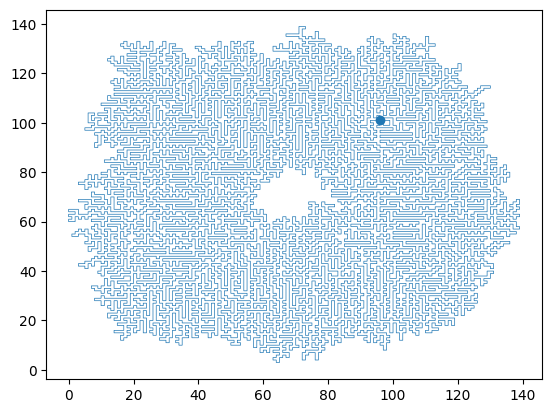

In [229]:
fig, ax = plt.subplots()
ax.plot(coords[:,0], coords[:,1], lw = 0.5)
start = np.argwhere(full_loop == "S")[0]
ax.scatter(coords[0, 0], coords[0, 1], c= "r)

In [204]:
area

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])